In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
from sklearn.svm import SVC
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline


In [75]:
loc_train="/home/siddharth/Documents/HackerEarth/1/train.csv"
loc_test="/home/siddharth/Documents/HackerEarth/1/test.csv"
train=pd.read_csv(loc_train)
test=pd.read_csv(loc_test)
train.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
0,2c9180975a056a64015a1e0a52e57021,Rear,195,1.02,46,45,Rear
1,2c9180975a056a64015a1e17b32171e4,Rear,203,1.09,59,54,Rear
2,2c9180975a056a64015a1de4deb16bd5,Front,26,0.96,104,108,Front
3,2c9180975a056a64015a1de4deb16bdd,Rear,199,0.81,38,47,Rear
4,2c9180975a056a64015a1de4deb16bd6,Rear,208,0.93,54,58,Rear


In [76]:
m={'Rear':3,'Front':1,'Right':2,'Left':4}
train['DetectedCamera']=train['DetectedCamera'].map(m)
train['SignFacing (Target)']=train['SignFacing (Target)'].map(m)
train.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
0,2c9180975a056a64015a1e0a52e57021,3,195,1.02,46,45,3
1,2c9180975a056a64015a1e17b32171e4,3,203,1.09,59,54,3
2,2c9180975a056a64015a1de4deb16bd5,1,26,0.96,104,108,1
3,2c9180975a056a64015a1de4deb16bdd,3,199,0.81,38,47,3
4,2c9180975a056a64015a1de4deb16bd6,3,208,0.93,54,58,3


In [83]:
a=train['DetectedCamera'].value_counts()
a

1    10910
2    10516
4     9298
3     7761
Name: DetectedCamera, dtype: int64

In [78]:
train['SignFacing (Target)'].value_counts()

1    21327
3    15662
2      821
4      675
Name: SignFacing (Target), dtype: int64

In [64]:
def get_angle(a):
    if a<=45 and a>=0:
        return 1
    elif a>315:
        return 1
    elif a<=135 and a>=45:
        return 2
    elif a<=225 and a>=135:
        return 3
    elif a<=315 and a>=225:
        return 4
    
#train['angle']=train['AngleOfSign'].map(lambda x: get_angle(x))


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38485 entries, 0 to 38484
Data columns (total 7 columns):
Id                     38485 non-null object
DetectedCamera         38485 non-null int64
AngleOfSign            38485 non-null int64
SignAspectRatio        38485 non-null float64
SignWidth              38485 non-null int64
SignHeight             38485 non-null int64
SignFacing (Target)    38485 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 2.1+ MB


In [66]:
test['DetectedCamera']=test['DetectedCamera'].map(m)
test_id=test['Id']
#test['angle']=test['AngleOfSign'].map(lambda x: get_angle(x))

test.drop(['Id'],axis=1,inplace=True)
test.shape

(31485, 4)

In [67]:
target=train['SignFacing (Target)']
train.drop(['SignFacing (Target)','Id'],axis=1,inplace=True)

train.head()

X,x,Y,y=train_test_split(train,target,test_size=0.3)

In [68]:
test.head()

,AngleOfSign,SignAspectRatio,SignWidth,SignHeight
0,67,0.63,107,169
1,16,0.88,61,69
2,44,1.15,232,202
3,50,1.10,137,125
4,30,0.95,99,104


In [69]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=70)
clf_gb.fit (X,Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=70, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [71]:
clf_gb.score(x,y)

0.96015936254980083

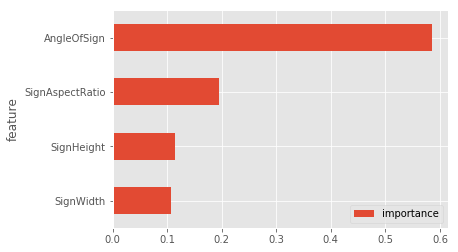

In [72]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf_gb.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh')




In [242]:
pred_prob=clf_gb.predict_proba(test)

In [243]:
output=pd.DataFrame()
output=pd.DataFrame(pred_prob)
output['Id']=test_id
output.rename(columns={0:'Front',1:'Left',2:'Rear',3:'Right'},inplace=True)

output.info()
output[['Id','Front','Left','Rear','Right']].to_csv("/home/siddharth/Documents/HackerEarth/1/output_gb1.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31485 entries, 0 to 31484
Data columns (total 5 columns):
Front    31485 non-null float64
Left     31485 non-null float64
Rear     31485 non-null float64
Right    31485 non-null float64
Id       31485 non-null object
dtypes: float64(4), object(1)
memory usage: 1.2+ MB
